# ESQUEMAS DE MODULAÇÃO DIGITAL

# SUMÁRIO

1. Métodos de Modulação sem Memória

2. Esquemas de Sinalização com Memória

3. Espectro de Potência de Sinais Modulados Digitalmente

&emsp;&emsp;  3.1 Densidade Espectral de Potência de Sistemas Modulados Digitalmente com Memória

&emsp;&emsp;&emsp;  3.1.1 Exemplo 3.1




<a name = "PowerSpectrum"></a>
## 3. Espectro de Potência de Sinais Modulados Digitalmente 

Nesta seção, será esutdado o cálculo de espectro de sinais modulados digitalmente com memória. Esse estudo é importante para determinar a banda necessária para a transmissão desses sinais e para saber a sua eficiência espectral. A priori, abordaremos o caso em que o sina a ser transmitido pode depender de todo o histórico de transmissão até o momento. A posteriori, trateremos dos casos em que o sistema posui uma memória finita, dos casos de modulação linear, e dos casos onde a modulação pode ser determinada por um espaço de estados de uma cadeia de Markov. Concluiremos a seção com o estudo dos casos de modulação de fase constante(CPM)

<a name = "3.1"></a>
### 3.1 Densidade Espectral de Potência de Sistemas Modulados Digitalmente com Memória

Consideremos um sinal modulado $v(t)$ possui um equivalente passa baixa $v_l(t)$ dado por:
$$
v_l(t) = \sum_{n = -\infty}^\infty s_l(t-nT, I_n) \tag{3.1}
$$
Onde $s_l(t, I_n)$ representa um dos M possíves sinais equivalentes passa-baixa, determinados pela sequência de informações em $n$ $I_n$, que é um processo estacionário. Para obter a densidade espectral de potência do sinal de RF, devemos primeiro encontrar  a densidade espectral de potência do equivalente passa-baixa. Assim, determinemos primeiramente a função de autocorrelação desse sinal:

\begin{align}
R_{v_l}(t + \tau, t) &= \mathbb{E} \left[ v_l(t + \tau)\,v_l^*(t) \right] \nonumber \\
&= \sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty}
\mathbb{E} \left[ s_l(t + \tau - nT;\, I_n)\, s_l^*(t - mT;\, I_m) \right] \tag{3.2}
\end{align}


Uma vez que $v_l(t)$ é um processo cicloestacionário, devemos calcular uma média de sua autocorrelação em um preíodo T. Assim, escrevemos:

$$
\bar{R}_{v_l}(\tau) = \frac{1}{T} \sum_{k=-\infty}^{\infty} \sum_{m=-\infty}^{\infty}
\int_{0}^{T} \mathbb{E} \left[ s_l(t + \tau - mT - kT; I_{m+k})\,
s_l^*(t - mT; I_m) \right] dt 
$$

$$
{=} \frac{1}{T} \sum_{k=-\infty}^{\infty} \sum_{m=-\infty}^{\infty}
\int_{-mT}^{-(m-1)T} \mathbb{E} \left[ s_l(u + \tau - kT; I_k)\,
s_l^*(u; I_0) \right] du
$$

$$
= \frac{1}{T} \sum_{k=-\infty}^{\infty} \int_{-\infty}^{\infty}
\mathbb{E} \left[ s_l(u + \tau - kT; I_k)\,
s_l^*(u; I_0) \right] du \tag{3.3}
$$

Definindo a função $g_k(\tau)$ como sendo a função de autocorrelação cruzada entre os k-ésimo e primeiro sinais em banda base, ou seja:

$$
g_k(\tau) = \int_{-\infty}^{\infty}E[s_l(t+\tau, I_k)s_l^*(t, I_0)] \tag{3.4}
$$

podemos escrever a densidade espectral de potência do sinal equivalente passa-baixo $S_{vl}(f)$ como sendo:

$$
S_{v_l}(f) = \frac{1}{T} \,\mathcal{F} \left[ \sum_{k=-\infty}^{\infty} g_k(\tau - kT) \right]
$$

$$
= \frac{1}{T} \sum_{k=-\infty}^{\infty} G_k(f) \,e^{-j2\pi k f T} \tag{3.5}
$$


Em que $G_{k}(f)$ é a transformada de Fourier da função $g_k(t)$. Espanindo a função $G_k(t)$, e após algum algebrismo, podemos reescrevê-la como:

$$
G_k(f) = E[S_l(f, I_k)S_l^*(f, I_0)] \tag{3.6}
$$

Em que $S_l(f, I_k)$ e $S_l(F, I_0)$ são as transformadas de Fourier de $s_l(t, I_k)$ e $s_l(t, I_0)$, respectivamente.

Se definirmos $G+k(f)' = G_k(f)-G_0(f)$, podemos reescrever s equação para o espectro de $v_l$ como:

$$
S_{v_l}(f) = \frac{1}{T} \sum_{k=-\infty}^{\infty} \left( G_k(f) - G_0(f) \right) e^{-j2\pi k f T}
+ \frac{1}{T} \sum_{k=-\infty}^{\infty} G_0(f) e^{-j2\pi k f T}
$$

$$
= \frac{1}{T} \sum_{k=-\infty}^{\infty} G'_k(f) \,e^{-j2\pi k f T}
+ \frac{1}{T^2} \sum_{k=-\infty}^{\infty} G_0(f)\, \delta \left( f - \frac{k}{T} \right) \tag{3.7}
$$

$$
= \frac{2}{T} \,\Re \left[ \sum_{k=1}^{\infty} G'_k(f) \,e^{-j2\pi k f T} \right]
+ \frac{1}{T^2} \sum_{k=-\infty}^{\infty} G_0 \left( \frac{k}{T} \right) \delta \left( f - \frac{k}{T} \right)
$$

Note que o espectro do sinal possui duas componentes, uma contínua e uma discreta em frequência

<a name = "3.1.1"></a>
### Exemplo 3.1

O exemplo abaixo ilustra o comportamento do espectro  de um sinal modulado digitalmente com memória. A primeira célula cria uma sequência de bis $I_k$ que contém a mensagem a ser transmitida. é utilizado um pulso *Linear raies Cossine (LRC)*, definido como:

$$
g(t) =
\begin{cases}
\frac{1}{2LT} \left( 1 - \cos\left( \frac{2\pi t}{LT} \right) \right) & \text{para } 0 \le t \le LT \\\\
0 & \text{caso contrário}
\end{cases}
$$

como pulso de fase, e é ilustrado na primeira imagem à esquerda. A função da fase $\phi(t)$ é ilustrada da imagem mais à direita.


I: [ 1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1
  1 -1 -1  1  1  1  1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1 -1
 -1  1]


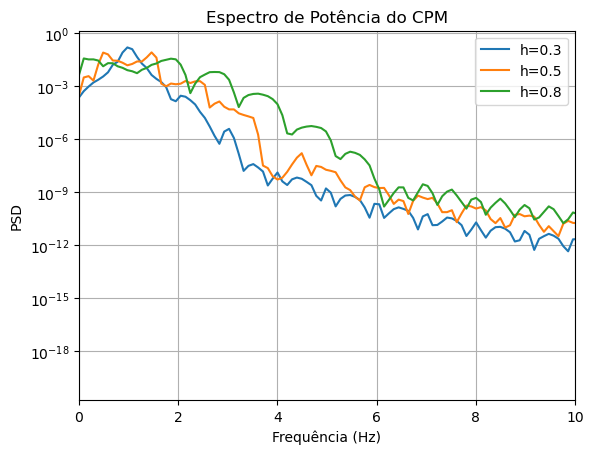

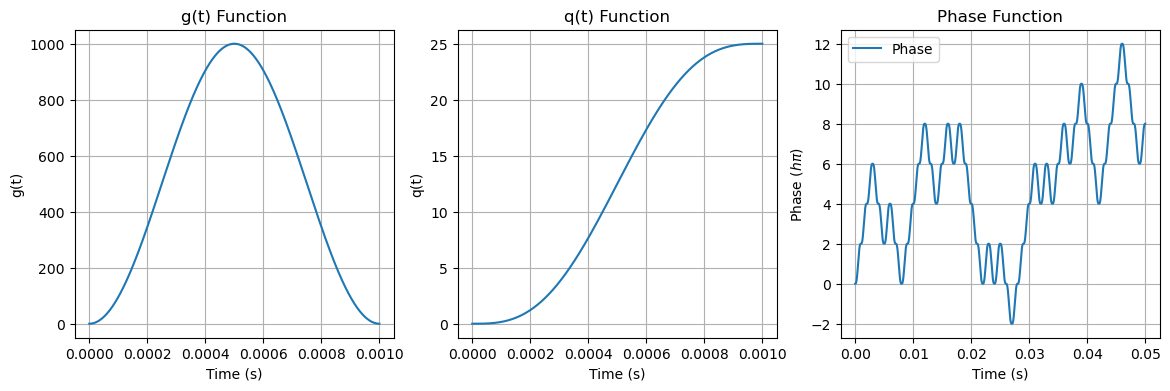

In [68]:
import numpy as np
from scipy.integrate import cumulative_trapezoid as cumtrapz
from matplotlib import pyplot as plt
from scipy.signal import welch

N = 100
A = 10 # Amplitude do sinal
f_c = 10**3 # Frequência da portadora
f_s = 10**5 # Frequência de amostragem
T = N/f_s
L = 1  # Fator de duração do pulso
h = [0.3, 0.5, 0.8]  # Índice de modulação
size_message = 50
I = np.random.choice([-1, 1], size=size_message)

print("I:", I)

# Tempo total de tranmissão
t = np.linspace(0, T*size_message, size_message*N, endpoint=False)

#Tempo de pulso
t_2 = np.linspace(0, L*T, size_message*N, endpoint=False)

def LRC(t, T, L):
    """    Function to compute the LRC (Raised Cosine) pulse shape.
    Args:
        t (numpy.ndarray): Time vector.
        T (float): Symbol period.
        L (int): Roll-off factor."""
    
    return np.where((t>= 0) & (t<=L*T), (1/(2*L*T))*(1-np.cos((2*np.pi * t)/(L*T))), 0)

def LREC(t, T, L):
    """    Function to compute the LREC (Raised Exponential Cosine) pulse shape.
    Args:
        t (numpy.ndarray): Time vector.
        T (float): Symbol period.
        L (int): Roll-off factor."""
    
    return np.where((t >= 0) & (t < L*T), 1.0/(L*T), 0.0)


g_t = LRC(t_2, T, L)
q_t = cumtrapz(g_t, dx=1/f_s, initial=0)

g_total = np.zeros_like(t)
q_total = np.zeros_like(t)
phase = np.zeros_like(t)

for i in h:
    for k in range(size_message):
        g_total = LRC(t - k*T, T, L)
        q_total = cumtrapz(g_total, dx=1/f_s, initial=0)
        phase += 2*np.pi * I[k] * i *q_total
    
    phase_hpi = phase/(i*np.pi)
    # Cálculo do equivalente passa-baixa de acordo com a equação 3.1
    v_l = np.exp(1j * phase)
    v_t = A*np.cos(2*np.pi * f_c * t + phase)

    f, Pxx = welch(v_t, fs=f_s, nperseg=1024, scaling = 'density')
    f_norm = f*T
    plt.semilogy(f_norm, Pxx)

plt.xlim(0, 10)
plt.title("Espectro de Potência do CPM")
plt.xlabel("Frequência (Hz)")
plt.ylabel("PSD")
plt.legend([f'h={i}' for i in h])
plt.grid(True)
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(14,4))

# Pulso LRC g(t)
axs[0].plot(t_2, g_t, label='g(t)')
axs[0].set_title('g(t) Function')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('g(t)')
axs[0].grid(True)

# Função integral q(t)
axs[1].plot(t_2, q_t, label='q(t)')
axs[1].set_title('q(t) Function')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('q(t)')
axs[1].grid(True)

# Função de fase ϕ(t)
axs[2].plot(t, phase_hpi, label='Phase')
axs[2].set_title('Phase Function')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel(r'Phase ($h\pi$)')
axs[2].grid(True)
axs[2].legend()

plt.show()






In [75]:

freqs = np.fft.fftfreq(len(t), d=1/f_s)
n = len(freqs)
h = 0.5

#Cálculo do sinal inicial (k = 0)
g0 = LRC(t, T, L)
q0 = cumtrapz(g0, dx=1/f_s, initial=0)
s0 = np.exp(1j * 2*np.pi*h*I[0] * q0)
S_0 = np.fft.fft(s0)             # espectro do pulso k=0
G_0 = S_0 * np.conj(S_0)           # auto-espectro para k=0

S_vl_c = np.zeros(n, dtype=float)   # parte contínua do PSD
S_vl_d = np.zeros(n, dtype=complex)   # parte discreta do PSD

for k in range(1, size_message):
    # Pulsos deslocados e cálculo da fase
    g_k = LRC(t - k*T, T, L)
    q_k = cumtrapz(g_k, dx=1/f_s, initial=0)
    phase = 2*np.pi * I[k] * h *q_k

    # Cálculo do sinal equivalente passa baixa s_k(t)e seu Espectro S_k(f)
    s_k = np.exp(1j * phase)
    S_k = np.fft.fft(s_k)
    
    #Espectro Cruzado S-k(t) x S_0*(t)
    G_k = S_k*np.conj(S_0)

    Gk_prime = G_k-G_0 

    S_vl_c += (2/T)*np.real(Gk_prime*np.exp(-1j * 2 * np.pi * k * freqs * T))
    S_vl_d += 1/(T)*G_0*np.exp(-1j * 2 * np.pi * k * freqs * T)


'''for m in range(-size_message, size_message+1):
    f_m = m / T
    # encontra índice de frequência mais próximo
    idx = np.argmin(np.abs(freqs - f_m))
    # peso do pico: G_0(f0)/T^2
    if idx >= 0 and idx < len(G_0):
        S_vl_d[idx] += G_0[idx] / (T**2)'''
    


S_vl_total = S_vl_c + S_vl_d
